In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv("C:\\Users\\Saeid\\OneDrive\\\Desktop\\dataset\\data.txt")
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X, y = data.values[:, 1:], data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [17]:
sc= StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.fit_transform(X_test)

In [18]:
cov_mat = np.cov(X_train_std.T)
eign_vals, eign_vecs = np.linalg.eig(cov_mat)
print('\nEignvalues \n%s' % eign_vals)


Eignvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


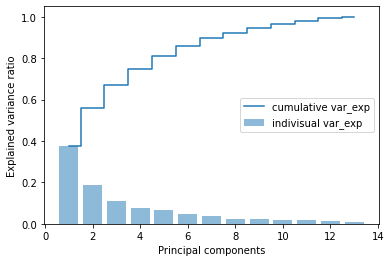

In [21]:
tot = sum(eign_vals)
var_exp = [(i / tot) for i in sorted(eign_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha = 0.5, align= 'center', label= 'indivisual var_exp')
plt.step(range(1,14), cum_var_exp, where= 'mid', label= 'cumulative var_exp')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [22]:
eign_pairs = [(np.abs(eign_vals[i]), eign_vecs[:, i]) for i in range(len(eign_vals))]

In [23]:
w = np.hstack((eign_pairs[0][1][:, np.newaxis], eign_pairs[1][1][:, np.newaxis]))

In [24]:
print('Matrix w:\n', w)

Matrix w:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [25]:
PCA = X_train_std[:].dot(w)

In [26]:
data2 = pd.DataFrame(PCA, columns=['Factor A', 'Factor B'])

In [27]:
data3 = data[['A']]

In [28]:
data_final = data3.join(data2)

In [29]:
data_final.head()

,A,Factor A,Factor B
0,1,2.598916,0.004841
1,1,0.158191,-2.266596
2,1,-2.637234,2.664886
3,1,-2.528484,0.518466
4,1,1.709226,-0.917195
